In [2]:
from langgraph.graph import StateGraph,START,END
from langchain_openai import ChatOpenAI
from dotenv import load_dotenv
from typing import TypedDict
load_dotenv()
model=ChatOpenAI()

In [3]:
#define the state
class LLMqaState(TypedDict):
    question:str
    answer:str

In [4]:
def LLmqa(state:LLMqaState)->LLMqaState:
    question=state['question']
    prompt=f'answer the following question:{question}'
    answer=model.invoke(prompt).content
    state['answer']=answer
    return state

In [5]:
#define node
graph=StateGraph(LLMqaState)
#create nodes
graph.add_node('LLMqa',LLmqa)

#create edges
graph.add_edge(START,'LLMqa')
graph.add_edge('LLMqa',END)

#compile the workflow
workflow=graph.compile()

initial_state={'question':"how far we can go beyond our galaxy"}

final_state=workflow.invoke(initial_state)

print(final_state)

print(final_state['answer']) # to see only the answer

{'question': 'how far we can go beyond our galaxy', 'answer': 'As of now, we have only been able to explore and study within our own Milky Way galaxy. Beyond our galaxy lies the vast expanse of the universe, consisting of billions of other galaxies. The furthest distance that humans have reached beyond our galaxy is through our telescopes, allowing us to observe and study distant galaxies billions of light-years away. \n\nIn terms of physical exploration beyond our galaxy, it is currently not possible with our current technology to travel such vast distances. The immense size and scale of the universe present significant challenges for human travel, due to the limitations imposed by the speed of light and the vast distances involved. However, theoretical concepts such as wormholes and warp drives have been proposed as potential methods for intergalactic travel, but these remain in the realm of science fiction for now.\n\nIn conclusion, while we can observe and study galaxies beyond our

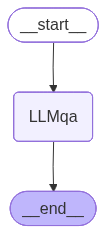

In [6]:
graph.compile()